In [13]:
pip install pandas numpy scipy matplotlib seaborn jupyter

Note: you may need to restart the kernel to use updated packages.


Importing all the required Libraries

In [14]:
pip install dash-bootstrap-components


Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install dash dash-renderer dash-html-components dash-core-components


Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install pulp

Note: you may need to restart the kernel to use updated packages.


Importing Libraries

Loading power allocation data, optimizes the allocations for customers to maximize job creation, and visualizing the results by comparing the current and optimized allocations. Performing optimisation using linear programming.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pulp 

<AxesSubplot:xlabel='Jobs Committed', ylabel='Count'>

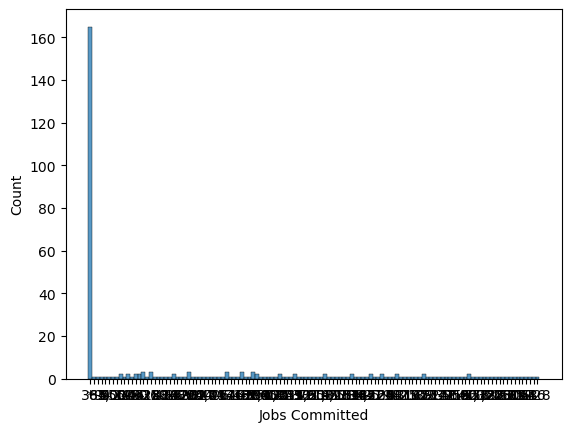

In [19]:
df = pd.read_csv('Hydropower_Allocations.csv')
sns.histplot(df['Jobs Committed'])
# Checking for correlation between allocations and jobs committed


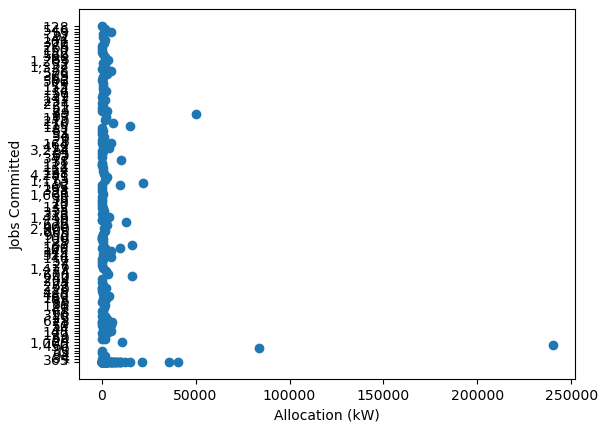

In [20]:
plt.scatter(df['Allocation (kW)'], df['Jobs Committed'])
plt.xlabel('Allocation (kW)')
plt.ylabel('Jobs Committed')
plt.show()

#Checking for correlation between allocations and jobs commited

In [21]:
customers = df['Customer'].unique().tolist()

# Hypothetical example where each kW of power is assumed to create 0.05 jobs
jobs_per_kw = 0.05

#Assumign a contant rate of 0.05 jobs per KW of power allocated

jobs_created = {customer: jobs_per_kw * df[df['Customer'] == customer]['Allocation (kW)'].sum() for customer in customers}
#calculating the number of jovs created for each customer based on their power allocation

In [22]:

jobs_created = {}

for customer in customers:
    # Sum up all allocations for the customer if there are multiple rows
    total_allocation = df.loc[df['Customer'] == customer, 'Allocation (kW)'].sum()
    jobs_created[customer] = jobs_per_kw * total_allocation

#Storing the results of the jobs created on a dictionary



In [23]:
max_allocation = df.set_index('Customer')['Allocation (kW)'].to_dict()
#Calculating the number of jobs created fo each customer based on their power allocation 

min_allocation = {customer: 0.8 * max_allocation[customer] for customer in customers}
#Setting the minimun allocation for each customer which is set to 80% of their max allocation 

In [24]:
prob = pulp.LpProblem("Hydropower_Optimization", pulp.LpMaximize)
#Setting up linear programming using PULP library

power_allocations = pulp.LpVariable.dicts("Allocation", customers, lowBound=0)
#Defining decision variiables for each customer's power allocation, setting the lower bound to 0

prob += pulp.lpSum([jobs_created[customer] * power_allocations[customer] for customer in customers])
#Defininf objective function ro maximize total jobs created by optimizing power allocatipns

for customer in customers:
    prob += power_allocations[customer] <= max_allocation[customer]
    prob += power_allocations[customer] >= min_allocation[customer]
#Setting constraints to ensure power allocations don't exceed the maxinmum and minimum limits for each customer

prob.solve()
#Solving the optimization problem

1

In [25]:
print("Status:", pulp.LpStatus[prob.status])
#Printing the status of the optimization

for customer in customers:
    print(f"Allocation for {customer}: {power_allocations[customer].varValue}")

#Printing the optimziation allocation for each customer

Status: Optimal
Allocation for 3M Company: 5460.0
Allocation for ADM Milling Company: 1900.0
Allocation for Advance 2000, Inc.: 120.0
Allocation for Air Products and Chemicals, Inc.: 10000.0
Allocation for Alcoa (West): 240000.0
Allocation for Amazon.com Services LLC: 10660.0
Allocation for Amcor Rigid Packaging USA, LLC: 1750.0
Allocation for Americold Real Estate, L.P.: 830.0
Allocation for API Heat Transfer, Inc.: 100.0
Allocation for Arconic Inc.: 5000.0
Allocation for Ashland Advanced Materials LLC: 340.0
Allocation for Ashton Potter (USA) LTD: 340.0
Allocation for ATI Allvac: 300.0
Allocation for Aurubis Buffalo, Inc.: 2800.0
Allocation for BlackRock Niagara LLC: 200.0
Allocation for Brunner, Inc.: 640.0
Allocation for Buffalo Newspress Inc.: 200.0
Allocation for Buffalo Tungsten Incorporated: 800.0
Allocation for Cascades Holding US Inc.: 7000.0
Allocation for CCL Label Inc.: 250.0
Allocation for CertainTeed Corporation: 2400.0
Allocation for Chocolate Delivery Systems, Inc.: 42

In [26]:

current_data = pd.Series(df['Allocation (kW)'].values, index=df['Customer']).to_dict()
#Creating a dictionary to store the current power allocations for each customer

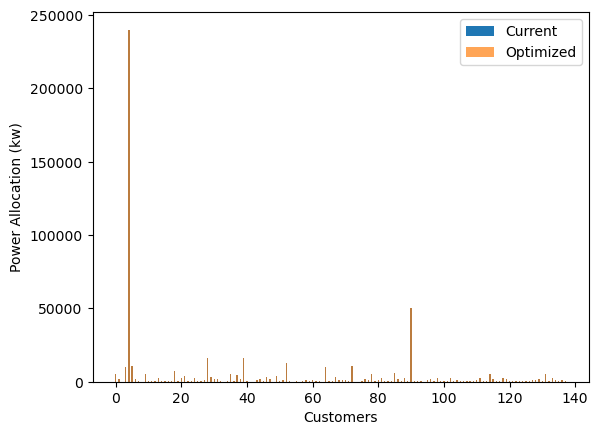

In [27]:
current_allocations = [current_data[customer] for customer in customers]
optimized_allocations = [power_allocations[customer].varValue for customer in customers]

index = range(len(customers))
plt.bar(index, current_allocations, width=0.4, label='Current')
plt.bar(index, optimized_allocations, width=0.4, label='Optimized', alpha=0.7)
plt.xlabel('Customers')
plt.ylabel('Power Allocation (kw)')
plt.legend()
plt.show()

#Comparing current optimized allocatrions and visualizing them in a bar chart


Adding a Machine Learning Model using Decision Trees

Loading, Preprocessing, Training, and Evaluating a Decision Tree Regressor model for predicting 'Jobs Committed' based on the 'Allocation (kW)' feature. Performing cross-validation and hyperparameter tuning for model performance, assessment and improvement. 

In [29]:
import pandas as pd

df = pd.read_csv('Hydropower_Allocations.csv')
#Loading the datset into the dataframe

for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = pd.to_numeric(df[column], errors='coerce')

# Identifingy non-numeric columns and converting them to numeric values to NaN

df.fillna(df.median(), inplace=True)
#Filling NaN values with the median of the respective columns


In [30]:
print(df.dtypes)
print(df.isnull().sum())
#Priting values of remaining NaN values and priniting the sum of values for each column

Customer           float64
Program            float64
City               float64
County             float64
Region             float64
Allocation (kW)      int64
Jobs Committed     float64
Date               float64
dtype: object
Customer           310
Program            310
City               310
County             310
Region             310
Allocation (kW)      0
Jobs Committed       0
Date               310
dtype: int64


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np


X = df[['Allocation (kW)']] 
y = df['Jobs Committed']
# Assuming 'Allocation (kW)' as the feature X and 'Jobs Committed' as the target y for regression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Splitting the dataset into training and testing sets 

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
#Initialising Decision Tree Regressor with a fixed random state, trained and tested

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")
#Calculating RMSE to evaluate model perforamnce 

Root Mean Squared Error: 129.9332086845466


In [32]:
input_value = 100  # Example input
input_df = pd.DataFrame([[input_value]], columns=['Allocation (kW)'])  
prediction = model.predict(input_df)
print(f"Predicted Jobs Committed: {prediction[0]}")
#Making a predicrtion using the trained model with using 100 as input value

Predicted Jobs Committed: 57.36363636363637


In [33]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(inplace=True, ascending=False)
print(feature_importances)
#Calculating and printing feature imporances

Allocation (kW)    1.0
dtype: float64


In [34]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
#Performing 5-fold cross validation to assess nodel's performance of multiple splits of the data

rmse_scores = np.sqrt(-scores)
print(f"Scores: {rmse_scores}")
print(f"Mean: {rmse_scores.mean()}")
print(f"Standard deviation: {rmse_scores.std()}")
#Calculating RMSE for each fold, printing score, mean and sd of RMSE scores

Scores: [142.08432322 180.25418125  76.50780273 110.13770181 126.31358322]
Mean: 127.05951844295006
Standard deviation: 34.34471478680348


In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [3, 5, 10], 'min_samples_leaf': [1, 2, 4]}
#Setting up grid of hyperparameters to be explored using grid search

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)
#Performing grid search with 5-fold cross validation and negative mse ans the scoring metric

print(f"Best parameters: {grid_search.best_params_}")
#Printing best hyperparameters found by using grid search

Best parameters: {'max_depth': 3, 'min_samples_leaf': 1}


In [36]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning, message="X does not have valid feature names")
#Suppress speciifc warning related to feature neames

Creating A Dashboard

Here we create a virtual dashboard using Dash to visualisze the results. Create a virtual dashboard to create the results

In [38]:
import dash
from dash import html, dcc
from dash.dependencies import Input, Output
import plotly.graph_objs as go
#Importing necessary libraries 

def mock_predict(input_value):
    return input_value / 1000
#Defining function for making predictions

app = dash.Dash(__name__)
#Initialiing dash application

app.layout = html.Div(style={'fontFamily': 'Arial, sans-serif', 'backgroundColor': '#F5F5F5', 'height': '100vh', 'display': 'flex', 'flexDirection': 'column', 'alignItems': 'center', 'justifyContent': 'center'}, children=[
    html.H1("Forecasted Job Growth per Hydro-Power Allocation Unit", style={'textAlign': 'center', 'color': 'darkblue'}),
    html.Div(style={'width': '68%', 'display': 'flex', 'flexDirection': 'column', 'alignItems': 'center'}, children=[
        dcc.Graph(id='prediction-graph', figure={}),  # Display the chart here
        html.Div(style={'textAlign': 'center'}, children=[
            html.Label("Enter Allocation (kW):", style={'fontSize': 16, 'fontWeight': 'bold', 'color': 'darkblue'}),
            dcc.Input(id='input-allocation', type='number', value=1000, style={'width': '100%', 'padding': '10px', 'fontSize': 16, 'border': '2px solid darkblue', 'borderRadius': '5px', 'marginBottom': '10px'}),
            html.Button('Predict Jobs', id='predict-button', style={'width': '100%', 'backgroundColor': 'darkblue', 'color': 'white', 'fontSize': 16, 'fontWeight': 'bold', 'border': 'none', 'padding': '10px', 'cursor': 'pointer'})
        ])
    ]),
])
#Defining layout of the web app, including title, graph to display prediction, input field to enter allocation value and button to trigger prediction

@app.callback(
    Output('prediction-graph', 'figure'),
    [Input('predict-button', 'n_clicks')],
    [dash.dependencies.State('input-allocation', 'value')]
)
#Setting up callback function 

def update_graph(n_clicks, allocation):
    if n_clicks:
        predicted_jobs = mock_predict(allocation)

        fig = go.Figure(go.Indicator(
            mode='gauge+number',
            value=predicted_jobs,
            domain={'x': [0, 1], 'y': [0, 1]},
            title={'text': 'Predicted Jobs'},
            gauge={'axis': {'range': [None, 100]}, 'bar': {'color': 'red'}}
        ))
        #Taking value entered to generate a job growth prediction

        fig.update_layout(
            paper_bgcolor='#F5F5F5',
            font=dict(size=16, color='black', family='Arial, sans-serif')
        )
        #Creating gauge chart using Plotly to display predicted job growth

        return fig
    else:
        return {} 
        #Updating chart with predicted job value and configuring appearance 

if __name__ == '__main__':
    app.run_server(debug=True)

#Starting dash development server, allowing to access web application locally for testing and visualization